In [ ]:
# Install kagglehub
!pip install -q kagglehub

# Setup Kaggle credentials
import os
os.environ['KAGGLE_USERNAME'] = "mamaniaharsh7"
os.environ['KAGGLE_KEY'] = "874d22c6d4c17ee2a0b9095c121f2cdc"

print("✅ Kaggle credentials configured!")

✅ Kaggle credentials configured!


In [ ]:
import kagglehub
import time

print("🚀 Starting download...")
print("="*50)

start_time = time.time()

# Download latest version
path = kagglehub.dataset_download("xdxd003/ff-c23")

elapsed = time.time() - start_time
print(f"\n✅ Download completed in {elapsed/60:.2f} minutes")
print(f"📁 Path to dataset files: {path}")

DATASET_PATH = path

print("\n📂 Checking what we downloaded...")
!ls -lh {DATASET_PATH}

🚀 Starting download...
Using Colab cache for faster access to the 'ff-c23' dataset.

✅ Download completed in 0.06 minutes
📁 Path to dataset files: /kaggle/input/ff-c23

📂 Checking what we downloaded...
total 0
drwxr-sr-x 10 1000 1000 0 Oct  4 09:16 FaceForensics++_C23


In [ ]:
import os
import glob

print("🔍 Exploring dataset structure...")
print("="*50)

# List all directories
print(f"\n📁 Main directory: {DATASET_PATH}")
print("\n📂 Contents:")

for item in sorted(os.listdir(DATASET_PATH)):
    item_path = os.path.join(DATASET_PATH, item)
    if os.path.isdir(item_path):
        num_files = len(os.listdir(item_path))
        print(f"  📁 {item}/ ({num_files} files)")
    else:
        size = os.path.getsize(item_path) / (1024*1024)
        print(f"  📄 {item} ({size:.2f} MB)")

# Find all video files
print("\n🎬 Searching for videos...")
all_videos = glob.glob(os.path.join(DATASET_PATH, "**/*.mp4"), recursive=True)
print(f"📊 Total videos found: {len(all_videos)}")

if all_videos:
    # Analyze video distribution
    video_by_folder = {}
    for video in all_videos:
        folder = os.path.basename(os.path.dirname(video))
        video_by_folder[folder] = video_by_folder.get(folder, 0) + 1

    print("\n📊 Videos by folder:")
    for folder, count in sorted(video_by_folder.items()):
        print(f"  {folder}: {count} videos")

    print("\n📝 Sample video paths (first 3):")
    for video in all_videos[:3]:
        print(f"  {video}")
else:
    print("⚠️ No videos found! Let's check the structure more carefully...")
    !find {DATASET_PATH} -type f -name "*.mp4" | head -5

🔍 Exploring dataset structure...

📁 Main directory: /kaggle/input/ff-c23

📂 Contents:
  📁 FaceForensics++_C23/ (8 files)

🎬 Searching for videos...
📊 Total videos found: 7000

📊 Videos by folder:
  DeepFakeDetection: 1000 videos
  Deepfakes: 1000 videos
  Face2Face: 1000 videos
  FaceShifter: 1000 videos
  FaceSwap: 1000 videos
  NeuralTextures: 1000 videos
  original: 1000 videos

📝 Sample video paths (first 3):
  /kaggle/input/ff-c23/FaceForensics++_C23/Face2Face/479_706.mp4
  /kaggle/input/ff-c23/FaceForensics++_C23/Face2Face/481_469.mp4
  /kaggle/input/ff-c23/FaceForensics++_C23/Face2Face/184_205.mp4


In [ ]:
import random

random.seed(42)

print("🎯 Selecting 30 videos for analysis...")
print("="*50)

# Based on typical FaceForensics++ structure
# Adjust these folder names based on Cell 3 output
original_folder = os.path.join(DATASET_PATH, "original")
deepfakes_folder = os.path.join(DATASET_PATH, "Deepfakes")

# Check if these folders exist, if not, try to find them
if not os.path.exists(original_folder):
    print("⚠️ 'original' folder not found at expected location")
    print("🔍 Searching for original videos...")
    # Try to find it
    possible_paths = glob.glob(os.path.join(DATASET_PATH, "**/original"), recursive=True)
    if possible_paths:
        original_folder = possible_paths[0]
        print(f"✅ Found at: {original_folder}")
    else:
        print("❌ Could not find original videos folder")

if not os.path.exists(deepfakes_folder):
    print("⚠️ 'Deepfakes' folder not found at expected location")
    print("🔍 Searching for deepfake videos...")
    possible_paths = glob.glob(os.path.join(DATASET_PATH, "**/Deepfakes"), recursive=True)
    if possible_paths:
        deepfakes_folder = possible_paths[0]
        print(f"✅ Found at: {deepfakes_folder}")
    else:
        print("❌ Could not find Deepfakes folder")

# Get video files
original_videos = glob.glob(os.path.join(original_folder, "*.mp4"))
deepfake_videos = glob.glob(os.path.join(deepfakes_folder, "*.mp4"))

print(f"\n📊 Found {len(original_videos)} original videos")
print(f"📊 Found {len(deepfake_videos)} deepfake videos")

# Select 15 from each
NUM_SAMPLES = 15
selected_original = random.sample(original_videos, min(NUM_SAMPLES, len(original_videos)))
selected_deepfakes = random.sample(deepfake_videos, min(NUM_SAMPLES, len(deepfake_videos)))

print(f"\n✅ Selected {len(selected_original)} original videos")
print(f"✅ Selected {len(selected_deepfakes)} deepfake videos")
print(f"🎯 Total: {len(selected_original) + len(selected_deepfakes)} videos")

# Store for later
SELECTED_VIDEOS = {
    'original': selected_original,
    'deepfake': selected_deepfakes
}

print("\n📝 Sample selections:")
print("Original videos:")
for i, v in enumerate(selected_original[:3], 1):
    print(f"  {i}. {os.path.basename(v)}")

print("\nDeepfake videos:")
for i, v in enumerate(selected_deepfakes[:3], 1):
    print(f"  {i}. {os.path.basename(v)}")

print("\n" + "="*50)
print("✅ Video selection complete!")

🎯 Selecting 30 videos for analysis...
⚠️ 'original' folder not found at expected location
🔍 Searching for original videos...
✅ Found at: /kaggle/input/ff-c23/FaceForensics++_C23/original
⚠️ 'Deepfakes' folder not found at expected location
🔍 Searching for deepfake videos...
✅ Found at: /kaggle/input/ff-c23/FaceForensics++_C23/Deepfakes

📊 Found 1000 original videos
📊 Found 1000 deepfake videos

✅ Selected 15 original videos
✅ Selected 15 deepfake videos
🎯 Total: 30 videos

📝 Sample selections:
Original videos:
  1. 694.mp4
  2. 207.mp4
  3. 106.mp4

Deepfake videos:
  1. 994_986.mp4
  2. 118_120.mp4
  3. 724_725.mp4

✅ Video selection complete!


In [ ]:
import cv2
import numpy as np
from pathlib import Path

print("🎬 Extracting frames from videos...")
print("="*50)

# Create output directory
FRAMES_DIR = "/content/extracted_frames"
os.makedirs(FRAMES_DIR, exist_ok=True)
os.makedirs(os.path.join(FRAMES_DIR, "original"), exist_ok=True)
os.makedirs(os.path.join(FRAMES_DIR, "deepfake"), exist_ok=True)

FRAMES_PER_VIDEO = 8
EXTRACTED_FRAMES = {'original': [], 'deepfake': []}

def extract_frames_from_video(video_path, output_dir, num_frames=8):
    """Extract evenly spaced frames from a video"""
    frames = []
    try:
        cap = cv2.VideoCapture(video_path)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        if total_frames == 0:
            print(f"⚠️ Could not read {os.path.basename(video_path)}")
            return frames

        # Calculate frame indices (evenly spaced)
        frame_indices = np.linspace(0, total_frames - 1, num_frames, dtype=int)
        video_name = Path(video_path).stem

        for idx, frame_num in enumerate(frame_indices):
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)
            ret, frame = cap.read()

            if ret:
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frame_filename = f"{video_name}_frame_{idx:03d}.jpg"
                frame_path = os.path.join(output_dir, frame_filename)
                cv2.imwrite(frame_path, cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR))
                frames.append(frame_path)

        cap.release()

    except Exception as e:
        print(f"❌ Error: {os.path.basename(video_path)}: {str(e)}")

    return frames

# Process original videos
print("📹 Processing original videos...")
for i, video_path in enumerate(selected_original):
    frames = extract_frames_from_video(
        video_path,
        os.path.join(FRAMES_DIR, "original"),
        FRAMES_PER_VIDEO
    )
    EXTRACTED_FRAMES['original'].extend(frames)
    if (i + 1) % 5 == 0:
        print(f"  ✓ {i+1}/{len(selected_original)} original videos processed")

print(f"✅ {len(EXTRACTED_FRAMES['original'])} frames from original videos")

# Process deepfake videos
print("\n📹 Processing deepfake videos...")
for i, video_path in enumerate(selected_deepfakes):
    frames = extract_frames_from_video(
        video_path,
        os.path.join(FRAMES_DIR, "deepfake"),
        FRAMES_PER_VIDEO
    )
    EXTRACTED_FRAMES['deepfake'].extend(frames)
    if (i + 1) % 5 == 0:
        print(f"  ✓ {i+1}/{len(selected_deepfakes)} deepfake videos processed")

print(f"✅ {len(EXTRACTED_FRAMES['deepfake'])} frames from deepfake videos")

print("\n" + "="*50)
print(f"🎉 Extraction complete!")
print(f"📊 Total: {len(EXTRACTED_FRAMES['original']) + len(EXTRACTED_FRAMES['deepfake'])} frames")
print(f"📁 Location: {FRAMES_DIR}")

🎬 Extracting frames from videos...
📹 Processing original videos...
  ✓ 5/15 original videos processed
  ✓ 10/15 original videos processed
  ✓ 15/15 original videos processed
✅ 120 frames from original videos

📹 Processing deepfake videos...
  ✓ 5/15 deepfake videos processed
  ✓ 10/15 deepfake videos processed
  ✓ 15/15 deepfake videos processed
✅ 120 frames from deepfake videos

🎉 Extraction complete!
📊 Total: 240 frames
📁 Location: /content/extracted_frames


🔍 Verifying extracted frames...
📊 Original frames: 120
📊 Deepfake frames: 120
📊 Total: 240

🖼️ Frame properties:
  Resolution: (854, 480)
  Mode: RGB

💾 Storage: 31.81 MB


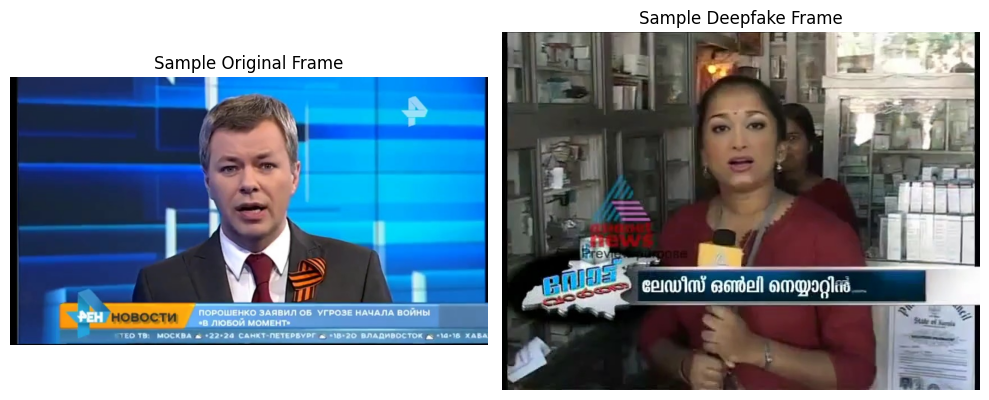


🎉 DATA PREPARATION COMPLETE!
✨ Ready for 15-minute analysis!


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

print("🔍 Verifying extracted frames...")
print("="*50)

total_original = len(EXTRACTED_FRAMES['original'])
total_deepfake = len(EXTRACTED_FRAMES['deepfake'])

print(f"📊 Original frames: {total_original}")
print(f"📊 Deepfake frames: {total_deepfake}")
print(f"📊 Total: {total_original + total_deepfake}")

if EXTRACTED_FRAMES['original']:
    sample = Image.open(EXTRACTED_FRAMES['original'][0])
    print(f"\n🖼️ Frame properties:")
    print(f"  Resolution: {sample.size}")
    print(f"  Mode: {sample.mode}")

# Storage used
total_size = sum(
    os.path.getsize(os.path.join(root, f))
    for root, dirs, files in os.walk(FRAMES_DIR)
    for f in files
)
print(f"\n💾 Storage: {total_size / (1024**2):.2f} MB")

# Show samples
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

if EXTRACTED_FRAMES['original']:
    img_orig = Image.open(EXTRACTED_FRAMES['original'][0])
    axes[0].imshow(img_orig)
    axes[0].set_title("Sample Original Frame")
    axes[0].axis('off')

if EXTRACTED_FRAMES['deepfake']:
    img_fake = Image.open(EXTRACTED_FRAMES['deepfake'][0])
    axes[1].imshow(img_fake)
    axes[1].set_title("Sample Deepfake Frame")
    axes[1].axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("🎉 DATA PREPARATION COMPLETE!")
print("="*50)
print("✨ Ready for 15-minute analysis!")

----
----

# ***Analysis***

## Import Libraries & Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import Counter
import time

# Set style
plt.style.use('default')
sns.set_palette("husl")

print("📊 FACEFORENSICS++ DATASET ANALYSIS")
print("="*60)
print(f"📁 Dataset path: {DATASET_PATH}")
print(f"🖼️ Frames directory: {FRAMES_DIR}")
print(f"📊 Original frames: {len(EXTRACTED_FRAMES['original'])}")
print(f"📊 Deepfake frames: {len(EXTRACTED_FRAMES['deepfake'])}")
print(f"📊 Total frames: {len(EXTRACTED_FRAMES['original']) + len(EXTRACTED_FRAMES['deepfake'])}")
print("="*60)

📊 FACEFORENSICS++ DATASET ANALYSIS
📁 Dataset path: /kaggle/input/ff-c23
🖼️ Frames directory: /content/extracted_frames
📊 Original frames: 120
📊 Deepfake frames: 120
📊 Total frames: 240


## Basic Statistics

In [ ]:
print("\n📈 SECTION 2: DATASET STATISTICS")
print("="*60)

# Create statistics dictionary
stats = {
    'Category': [],
    'Video Count': [],
    'Frame Count': [],
    'Frames per Video': []
}

# Original videos stats
stats['Category'].append('Original (Real)')
stats['Video Count'].append(len(SELECTED_VIDEOS['original']))
stats['Frame Count'].append(len(EXTRACTED_FRAMES['original']))
stats['Frames per Video'].append(len(EXTRACTED_FRAMES['original']) / len(SELECTED_VIDEOS['original']))

# Deepfake videos stats
stats['Category'].append('Deepfake (Fake)')
stats['Video Count'].append(len(SELECTED_VIDEOS['deepfake']))
stats['Frame Count'].append(len(EXTRACTED_FRAMES['deepfake']))
stats['Frames per Video'].append(len(EXTRACTED_FRAMES['deepfake']) / len(SELECTED_VIDEOS['deepfake']))

# Totals
stats['Category'].append('TOTAL')
stats['Video Count'].append(len(SELECTED_VIDEOS['original']) + len(SELECTED_VIDEOS['deepfake']))
stats['Frame Count'].append(len(EXTRACTED_FRAMES['original']) + len(EXTRACTED_FRAMES['deepfake']))
stats['Frames per Video'].append('N/A')

# Create DataFrame
df_stats = pd.DataFrame(stats)
print("\n📊 Dataset Overview:")
print(df_stats.to_string(index=False))

# Balance ratio
balance_ratio = len(EXTRACTED_FRAMES['original']) / len(EXTRACTED_FRAMES['deepfake'])
print(f"\n⚖️ Dataset Balance Ratio (Real:Fake): {balance_ratio:.2f}:1")

if 0.9 <= balance_ratio <= 1.1:
    print("   ✅ Dataset is well-balanced!")
elif 0.7 <= balance_ratio <= 1.3:
    print("   ⚠️ Dataset has slight imbalance")
else:
    print("   ❌ Dataset is significantly imbalanced")


📈 SECTION 2: DATASET STATISTICS

📊 Dataset Overview:
       Category  Video Count  Frame Count Frames per Video
Original (Real)           15          120              8.0
Deepfake (Fake)           15          120              8.0
          TOTAL           30          240              N/A

⚖️ Dataset Balance Ratio (Real:Fake): 1.00:1
   ✅ Dataset is well-balanced!


## Frame Resolution & Format Analysis

In [ ]:
print("\n🖼️ Frame Resolution & Format Analysis")
print("-"*60)

# Analyze frame properties
resolutions = {'original': [], 'deepfake': []}
file_sizes = {'original': [], 'deepfake': []}
aspect_ratios = {'original': [], 'deepfake': []}

# Sample analysis (analyze all frames)
for category in ['original', 'deepfake']:
    for frame_path in EXTRACTED_FRAMES[category]:
        img = Image.open(frame_path)
        resolutions[category].append(img.size)
        file_sizes[category].append(os.path.getsize(frame_path) / 1024)  # KB
        aspect_ratio = img.size[0] / img.size[1]
        aspect_ratios[category].append(aspect_ratio)

# Resolution statistics
print("\n📐 Resolution Statistics:")
orig_res = Counter(resolutions['original'])
fake_res = Counter(resolutions['deepfake'])

print(f"\n  Original frames:")
for res, count in orig_res.most_common(3):
    print(f"    {res[0]}x{res[1]}: {count} frames ({count/len(resolutions['original'])*100:.1f}%)")

print(f"\n  Deepfake frames:")
for res, count in fake_res.most_common(3):
    print(f"    {res[0]}x{res[1]}: {count} frames ({count/len(resolutions['deepfake'])*100:.1f}%)")

# File size statistics
print(f"\n💾 File Size Statistics (KB):")
print(f"  Original frames:")
print(f"    Mean: {np.mean(file_sizes['original']):.2f} KB")
print(f"    Min: {np.min(file_sizes['original']):.2f} KB")
print(f"    Max: {np.max(file_sizes['original']):.2f} KB")

print(f"\n  Deepfake frames:")
print(f"    Mean: {np.mean(file_sizes['deepfake']):.2f} KB")
print(f"    Min: {np.min(file_sizes['deepfake']):.2f} KB")
print(f"    Max: {np.max(file_sizes['deepfake']):.2f} KB")

# Total storage
total_storage = sum(file_sizes['original']) + sum(file_sizes['deepfake'])
print(f"\n📦 Total Storage for Extracted Frames: {total_storage/1024:.2f} MB")

# Aspect ratio
print(f"\n📏 Aspect Ratios:")
print(f"  Original: {np.mean(aspect_ratios['original']):.3f} ± {np.std(aspect_ratios['original']):.3f}")
print(f"  Deepfake: {np.mean(aspect_ratios['deepfake']):.3f} ± {np.std(aspect_ratios['deepfake']):.3f}")


🖼️ Frame Resolution & Format Analysis
------------------------------------------------------------

📐 Resolution Statistics:

  Original frames:
    1280x720: 32 frames (26.7%)
    1920x1080: 24 frames (20.0%)
    640x480: 24 frames (20.0%)

  Deepfake frames:
    640x480: 32 frames (26.7%)
    1920x1080: 24 frames (20.0%)
    600x480: 24 frames (20.0%)

💾 File Size Statistics (KB):
  Original frames:
    Mean: 141.23 KB
    Min: 54.89 KB
    Max: 365.18 KB

  Deepfake frames:
    Mean: 130.22 KB
    Min: 44.70 KB
    Max: 367.31 KB

📦 Total Storage for Extracted Frames: 31.81 MB

📏 Aspect Ratios:
  Original: 1.633 ± 0.202
  Deepfake: 1.526 ± 0.238


## Image Quality Metrics


In [ ]:
print("\n🎨 Image Quality Metrics")
print("-"*60)

# Analyze image statistics
brightness = {'original': [], 'deepfake': []}
contrast = {'original': [], 'deepfake': []}
sharpness = {'original': [], 'deepfake': []}

def calculate_metrics(frame_path):
    """Calculate basic image quality metrics"""
    img = cv2.imread(frame_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Brightness (mean pixel value)
    brightness_val = np.mean(img_gray)

    # Contrast (std of pixel values)
    contrast_val = np.std(img_gray)

    # Sharpness (Laplacian variance)
    laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
    sharpness_val = laplacian.var()

    return brightness_val, contrast_val, sharpness_val

# Sample 30 frames from each category for speed
sample_size = min(30, len(EXTRACTED_FRAMES['original']), len(EXTRACTED_FRAMES['deepfake']))

print(f"📊 Analyzing {sample_size} samples from each category...")

import random
for category in ['original', 'deepfake']:
    samples = random.sample(EXTRACTED_FRAMES[category], sample_size)
    for frame_path in samples:
        b, c, s = calculate_metrics(frame_path)
        brightness[category].append(b)
        contrast[category].append(c)
        sharpness[category].append(s)

# Display statistics
print(f"\n💡 Brightness (0-255 scale):")
print(f"  Original: {np.mean(brightness['original']):.2f} ± {np.std(brightness['original']):.2f}")
print(f"  Deepfake: {np.mean(brightness['deepfake']):.2f} ± {np.std(brightness['deepfake']):.2f}")
diff_brightness = abs(np.mean(brightness['original']) - np.mean(brightness['deepfake']))
print(f"  Difference: {diff_brightness:.2f}")

print(f"\n📊 Contrast (std of pixel values):")
print(f"  Original: {np.mean(contrast['original']):.2f} ± {np.std(contrast['original']):.2f}")
print(f"  Deepfake: {np.mean(contrast['deepfake']):.2f} ± {np.std(contrast['deepfake']):.2f}")
diff_contrast = abs(np.mean(contrast['original']) - np.mean(contrast['deepfake']))
print(f"  Difference: {diff_contrast:.2f}")

print(f"\n🔍 Sharpness (Laplacian variance):")
print(f"  Original: {np.mean(sharpness['original']):.2f} ± {np.std(sharpness['original']):.2f}")
print(f"  Deepfake: {np.mean(sharpness['deepfake']):.2f} ± {np.std(sharpness['deepfake']):.2f}")
diff_sharpness = abs(np.mean(sharpness['original']) - np.mean(sharpness['deepfake']))
print(f"  Difference: {diff_sharpness:.2f}")

print("\n💭 Interpretation:")
if diff_brightness > 10:
    print("  ⚠️ Significant brightness difference detected")
else:
    print("  ✅ Similar brightness levels")

if diff_sharpness > 50:
    print("  ⚠️ Notable sharpness difference (may help detection)")
else:
    print("  ✅ Similar sharpness levels")


🎨 Image Quality Metrics
------------------------------------------------------------
📊 Analyzing 30 samples from each category...

💡 Brightness (0-255 scale):
  Original: 111.56 ± 39.56
  Deepfake: 91.56 ± 40.73
  Difference: 20.00

📊 Contrast (std of pixel values):
  Original: 60.08 ± 7.60
  Deepfake: 53.85 ± 12.94
  Difference: 6.23

🔍 Sharpness (Laplacian variance):
  Original: 339.77 ± 292.27
  Deepfake: 338.32 ± 339.63
  Difference: 1.45

💭 Interpretation:
  ⚠️ Significant brightness difference detected
  ✅ Similar sharpness levels


# ***Visual Analysis***

## Sample Grid Visualization


👁️ SECTION 3: VISUAL INSPECTION


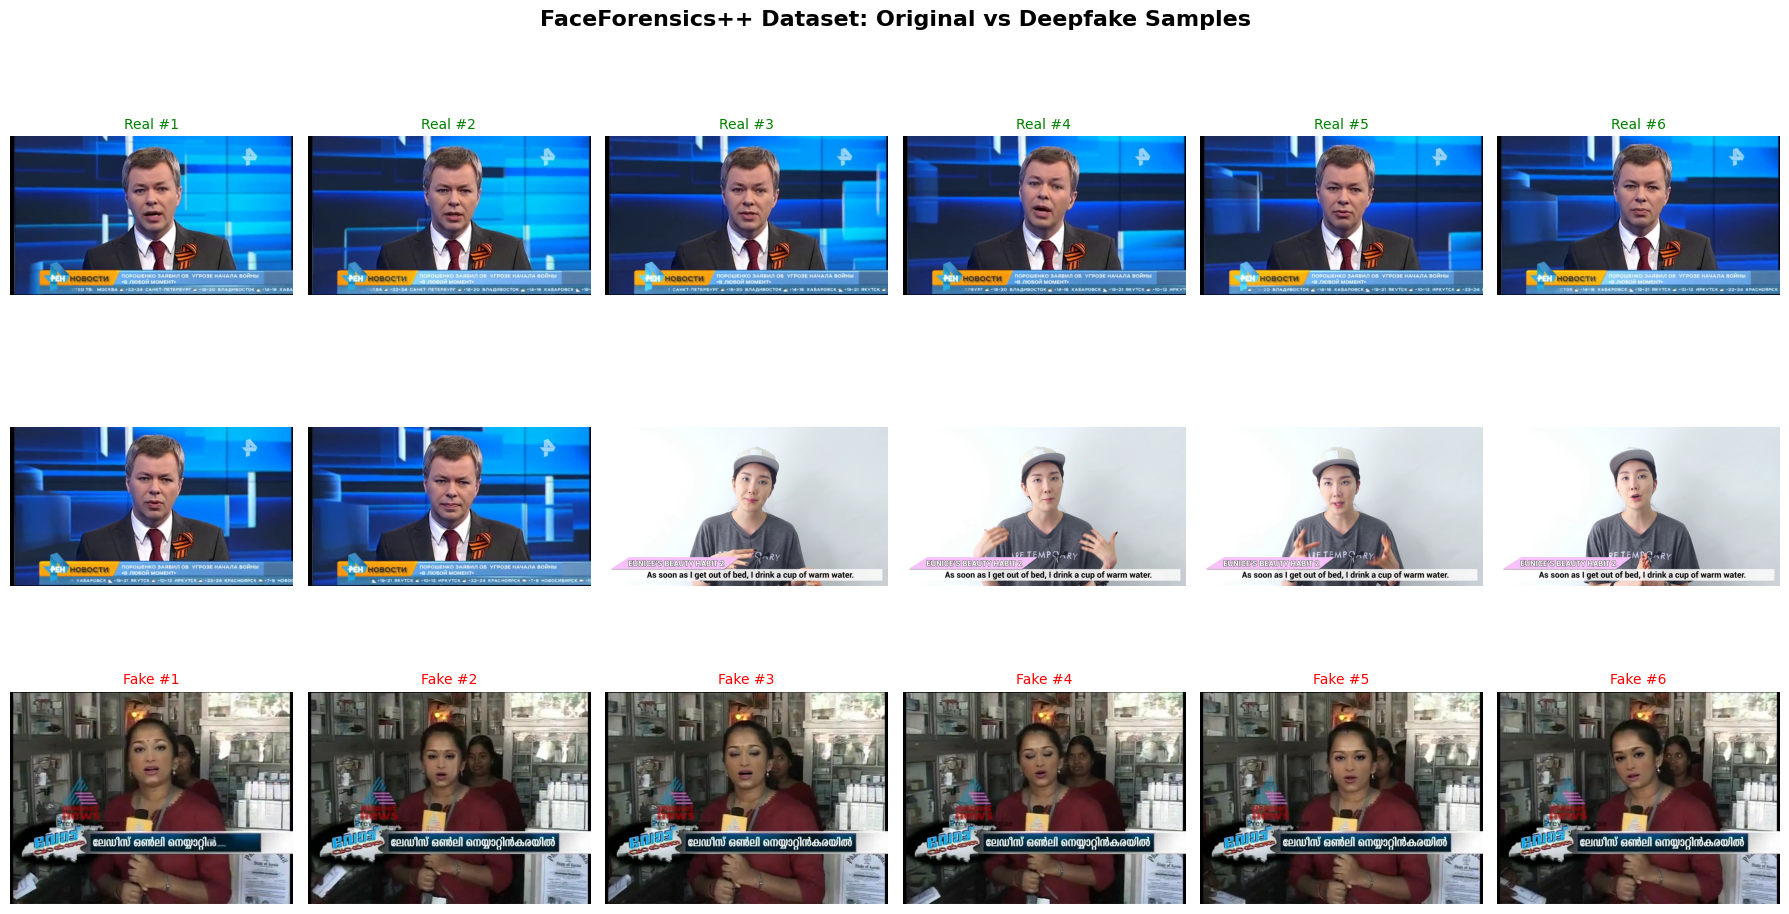

✅ Visual grid displayed
💡 Tip: Look for visual differences in face boundaries, lighting, and texture


In [ ]:
print("\n👁️ SECTION 3: VISUAL INSPECTION")
print("="*60)

# Create comparison grids
fig, axes = plt.subplots(3, 6, figsize=(18, 10))
fig.suptitle('FaceForensics++ Dataset: Original vs Deepfake Samples', fontsize=16, fontweight='bold')

# Top 2 rows: Real frames
for i in range(2):
    for j in range(6):
        idx = i * 6 + j
        if idx < len(EXTRACTED_FRAMES['original']):
            img = Image.open(EXTRACTED_FRAMES['original'][idx])
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if i == 0:
                axes[i, j].set_title(f'Real #{idx+1}', fontsize=10, color='green')
        else:
            axes[i, j].axis('off')

# Bottom row: Fake frames
for j in range(6):
    if j < len(EXTRACTED_FRAMES['deepfake']):
        img = Image.open(EXTRACTED_FRAMES['deepfake'][j])
        axes[2, j].imshow(img)
        axes[2, j].axis('off')
        axes[2, j].set_title(f'Fake #{j+1}', fontsize=10, color='red')
    else:
        axes[2, j].axis('off')

plt.tight_layout()
plt.show()

print("✅ Visual grid displayed")
print("💡 Tip: Look for visual differences in face boundaries, lighting, and texture")

## Side-by-Side Comparison


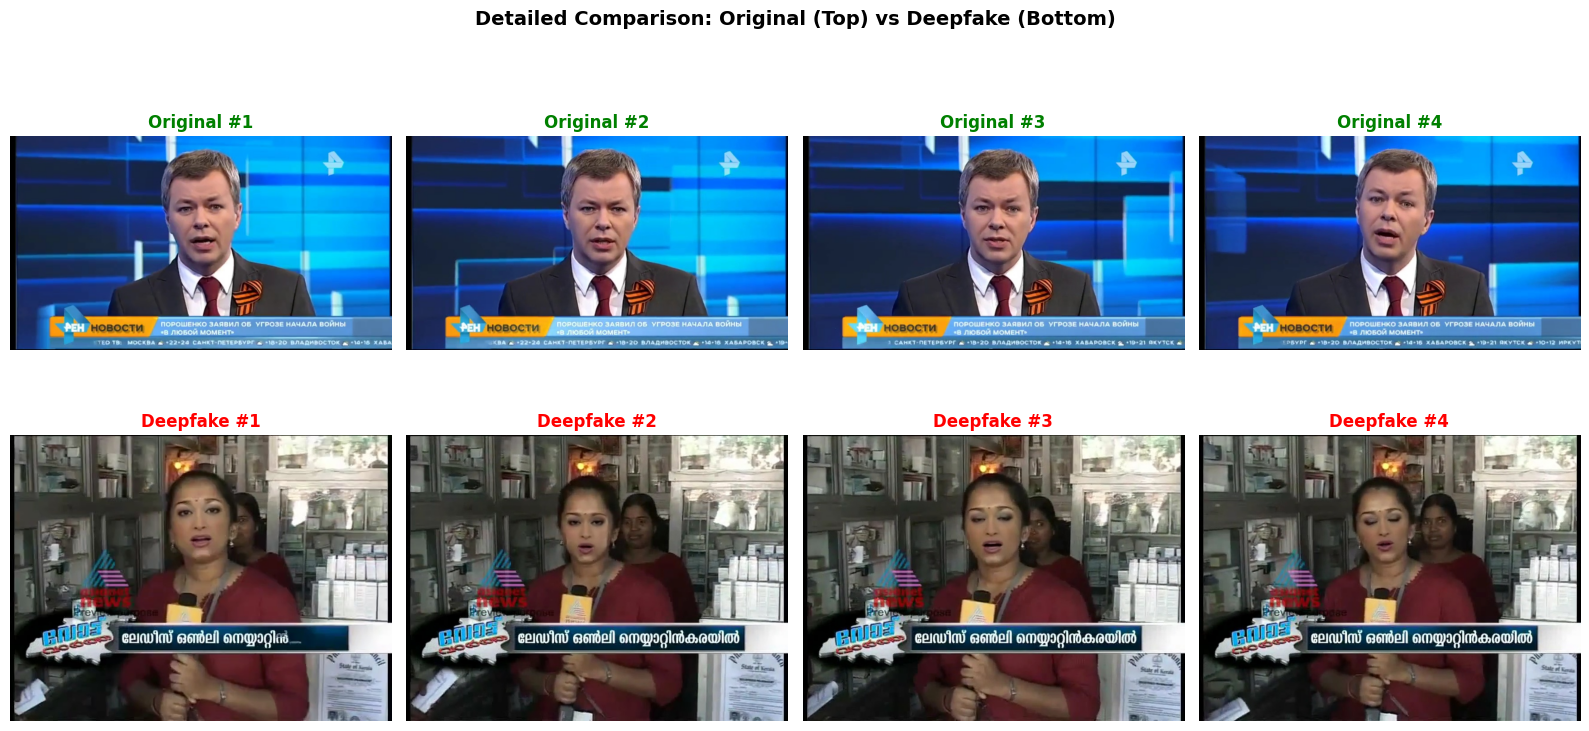

✅ Side-by-side comparison displayed


In [ ]:
# Detailed side-by-side comparison
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Detailed Comparison: Original (Top) vs Deepfake (Bottom)', fontsize=14, fontweight='bold')

for i in range(4):
    # Original
    if i < len(EXTRACTED_FRAMES['original']):
        img_orig = Image.open(EXTRACTED_FRAMES['original'][i])
        axes[0, i].imshow(img_orig)
        axes[0, i].set_title(f'Original #{i+1}', color='green', fontweight='bold')
        axes[0, i].axis('off')

    # Deepfake
    if i < len(EXTRACTED_FRAMES['deepfake']):
        img_fake = Image.open(EXTRACTED_FRAMES['deepfake'][i])
        axes[1, i].imshow(img_fake)
        axes[1, i].set_title(f'Deepfake #{i+1}', color='red', fontweight='bold')
        axes[1, i].axis('off')

plt.tight_layout()
plt.show()

print("✅ Side-by-side comparison displayed")

## Distribution Plots

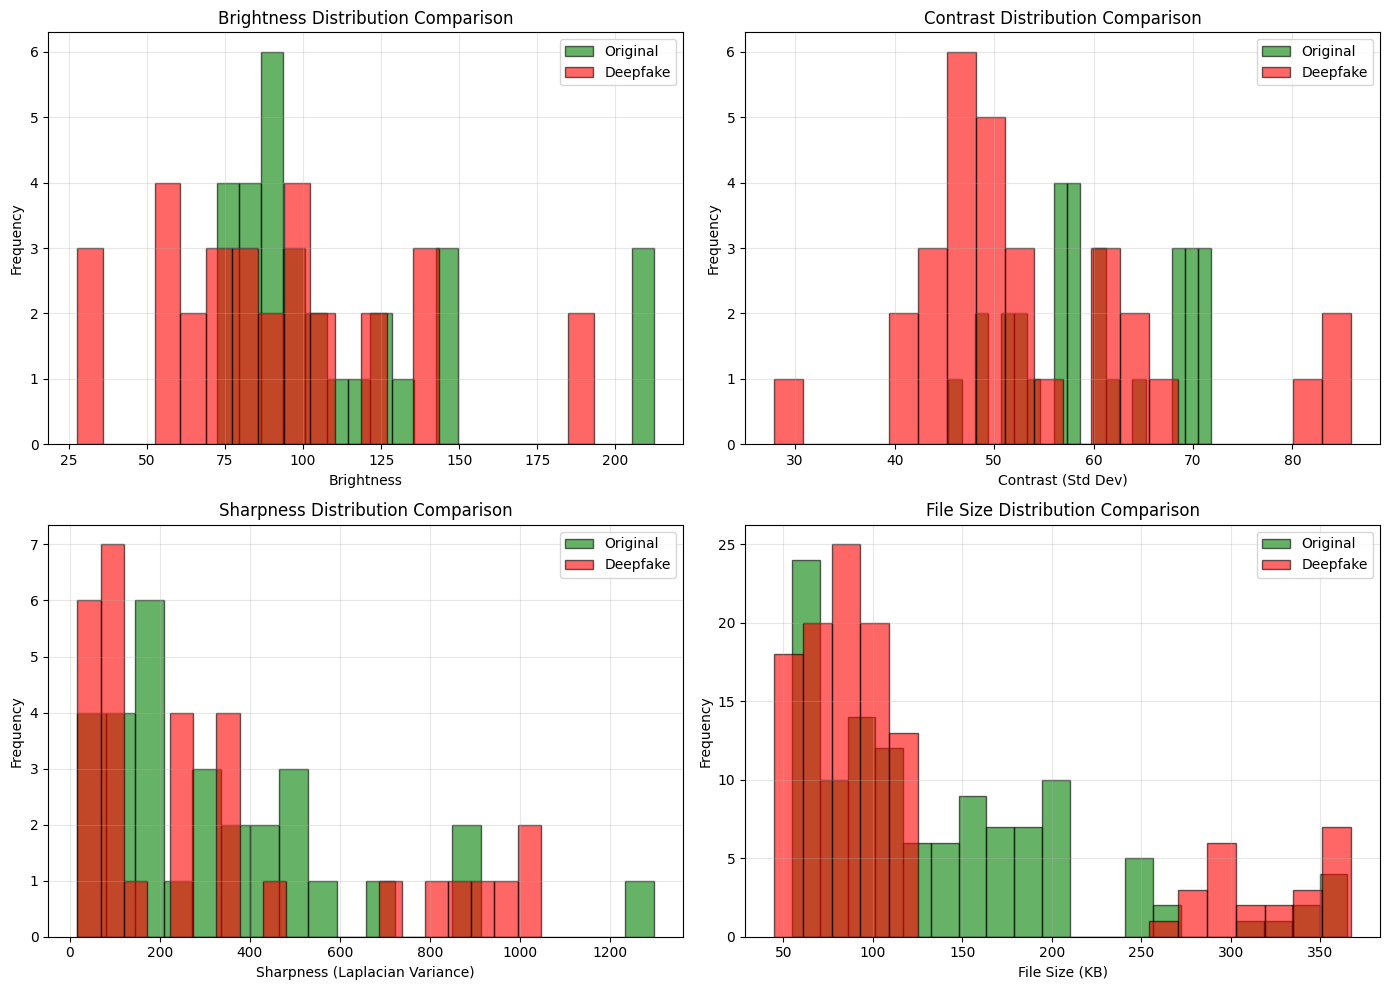

✅ Distribution plots displayed

💭 Key Observations:
  - Overlapping distributions suggest similar visual characteristics
  - Distinct distributions may indicate detectable differences


In [ ]:
# Create distribution comparison plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Brightness distribution
axes[0, 0].hist(brightness['original'], bins=20, alpha=0.6, label='Original', color='green', edgecolor='black')
axes[0, 0].hist(brightness['deepfake'], bins=20, alpha=0.6, label='Deepfake', color='red', edgecolor='black')
axes[0, 0].set_xlabel('Brightness')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Brightness Distribution Comparison')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Contrast distribution
axes[0, 1].hist(contrast['original'], bins=20, alpha=0.6, label='Original', color='green', edgecolor='black')
axes[0, 1].hist(contrast['deepfake'], bins=20, alpha=0.6, label='Deepfake', color='red', edgecolor='black')
axes[0, 1].set_xlabel('Contrast (Std Dev)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Contrast Distribution Comparison')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Sharpness distribution
axes[1, 0].hist(sharpness['original'], bins=20, alpha=0.6, label='Original', color='green', edgecolor='black')
axes[1, 0].hist(sharpness['deepfake'], bins=20, alpha=0.6, label='Deepfake', color='red', edgecolor='black')
axes[1, 0].set_xlabel('Sharpness (Laplacian Variance)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Sharpness Distribution Comparison')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# File size distribution
axes[1, 1].hist(file_sizes['original'], bins=20, alpha=0.6, label='Original', color='green', edgecolor='black')
axes[1, 1].hist(file_sizes['deepfake'], bins=20, alpha=0.6, label='Deepfake', color='red', edgecolor='black')
axes[1, 1].set_xlabel('File Size (KB)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('File Size Distribution Comparison')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Distribution plots displayed")
print("\n💭 Key Observations:")
print("  - Overlapping distributions suggest similar visual characteristics")
print("  - Distinct distributions may indicate detectable differences")

# ***Feasibility Analysis***

## Processing Speed Test

In [ ]:
print("\n⚡ SECTION 4: FEASIBILITY ANALYSIS")
print("="*60)
print("\n🚀 Testing Processing Speed...")
print("-"*60)

import time

# Test 1: Image Loading Speed
print("\n1️⃣ Image Loading Speed Test")
test_images = EXTRACTED_FRAMES['original'][:50] + EXTRACTED_FRAMES['deepfake'][:50]

start_time = time.time()
loaded_images = []
for img_path in test_images:
    img = Image.open(img_path)
    img_array = np.array(img)
    loaded_images.append(img_array)
load_time = time.time() - start_time

images_per_sec = len(test_images) / load_time
print(f"   ✓ Loaded {len(test_images)} images in {load_time:.2f} seconds")
print(f"   ✓ Speed: {images_per_sec:.2f} images/second")

# Test 2: Preprocessing Speed (resize to common CNN input size)
print("\n2️⃣ Preprocessing Speed Test (Resize to 224x224)")
start_time = time.time()
preprocessed = []
for img_array in loaded_images:
    img_resized = cv2.resize(img_array, (224, 224))
    img_normalized = img_resized / 255.0  # Normalize
    preprocessed.append(img_normalized)
preprocess_time = time.time() - start_time

preprocess_per_sec = len(test_images) / preprocess_time
print(f"   ✓ Preprocessed {len(test_images)} images in {preprocess_time:.2f} seconds")
print(f"   ✓ Speed: {preprocess_per_sec:.2f} images/second")

# Test 3: Batch Creation
print("\n3️⃣ Batch Creation Speed Test")
start_time = time.time()
batch_size = 32
batches = []
for i in range(0, len(preprocessed), batch_size):
    batch = np.array(preprocessed[i:i+batch_size])
    batches.append(batch)
batch_time = time.time() - start_time

print(f"   ✓ Created {len(batches)} batches in {batch_time:.2f} seconds")
print(f"   ✓ Batch size: {batch_size}")

# Overall pipeline speed
total_time = load_time + preprocess_time + batch_time
overall_speed = len(test_images) / total_time
print(f"\n📊 Overall Pipeline Speed: {overall_speed:.2f} images/second")
print(f"📊 Total processing time for 100 images: {total_time:.2f} seconds")

# Extrapolation
print("\n🔮 Extrapolation to Full Dataset:")
total_frames = len(EXTRACTED_FRAMES['original']) + len(EXTRACTED_FRAMES['deepfake'])
estimated_full_time = total_frames / overall_speed
print(f"   Current dataset ({total_frames} frames): ~{estimated_full_time:.2f} seconds")

# Larger dataset estimates
for size in [500, 1000, 2000, 5000]:
    est_time = size / overall_speed
    print(f"   {size} frames: ~{est_time:.2f} seconds (~{est_time/60:.2f} minutes)")


⚡ SECTION 4: FEASIBILITY ANALYSIS

🚀 Testing Processing Speed...
------------------------------------------------------------

1️⃣ Image Loading Speed Test
   ✓ Loaded 100 images in 1.33 seconds
   ✓ Speed: 75.00 images/second

2️⃣ Preprocessing Speed Test (Resize to 224x224)
   ✓ Preprocessed 100 images in 0.29 seconds
   ✓ Speed: 342.08 images/second

3️⃣ Batch Creation Speed Test
   ✓ Created 4 batches in 0.09 seconds
   ✓ Batch size: 32

📊 Overall Pipeline Speed: 58.19 images/second
📊 Total processing time for 100 images: 1.72 seconds

🔮 Extrapolation to Full Dataset:
   Current dataset (240 frames): ~4.12 seconds
   500 frames: ~8.59 seconds (~0.14 minutes)
   1000 frames: ~17.18 seconds (~0.29 minutes)
   2000 frames: ~34.37 seconds (~0.57 minutes)
   5000 frames: ~85.92 seconds (~1.43 minutes)


## Memory Profiling

In [ ]:
print("\n💾 Memory Usage Analysis")
print("-"*60)

import sys

# Test memory for different batch sizes
print("\n📦 Testing Different Batch Sizes...")

batch_sizes = [8, 16, 32, 64]
memory_usage = []

for bs in batch_sizes:
    # Create a batch
    sample_batch = np.array(preprocessed[:bs])

    # Calculate memory
    memory_mb = sample_batch.nbytes / (1024**2)
    memory_usage.append(memory_mb)

    print(f"   Batch size {bs:3d}: {memory_mb:.2f} MB")

# Estimate for full dataset
print("\n📊 Full Dataset Memory Estimates:")
single_image_size = preprocessed[0].nbytes / (1024**2)
print(f"   Single image (224x224x3, float32): {single_image_size:.3f} MB")

total_frames = len(EXTRACTED_FRAMES['original']) + len(EXTRACTED_FRAMES['deepfake'])
full_dataset_memory = single_image_size * total_frames
print(f"   Full dataset in memory ({total_frames} frames): {full_dataset_memory:.2f} MB")

# GPU memory simulation
print("\n🖥️ GPU Memory Requirements (Estimated):")
for bs in [16, 32, 64]:
    # Rough estimate: input + gradients + activations ≈ 3x input size
    gpu_memory = (single_image_size * bs * 3)
    print(f"   Batch size {bs}: ~{gpu_memory:.2f} MB (input + gradients + activations)")

print("\n✅ Memory Assessment:")
if full_dataset_memory < 1000:  # Less than 1GB
    print("   ✓ Full dataset can easily fit in RAM")
else:
    print("   ⚠️ Consider using data generators instead of loading all at once")

# Check current memory usage
print(f"\n📈 Current Python Process Memory: {sys.getsizeof(preprocessed) / (1024**2):.2f} MB")


💾 Memory Usage Analysis
------------------------------------------------------------

📦 Testing Different Batch Sizes...
   Batch size   8: 9.19 MB
   Batch size  16: 18.38 MB
   Batch size  32: 36.75 MB
   Batch size  64: 73.50 MB

📊 Full Dataset Memory Estimates:
   Single image (224x224x3, float32): 1.148 MB
   Full dataset in memory (240 frames): 275.62 MB

🖥️ GPU Memory Requirements (Estimated):
   Batch size 16: ~55.12 MB (input + gradients + activations)
   Batch size 32: ~110.25 MB (input + gradients + activations)
   Batch size 64: ~220.50 MB (input + gradients + activations)

✅ Memory Assessment:
   ✓ Full dataset can easily fit in RAM

📈 Current Python Process Memory: 0.00 MB


In [ ]:
print("🎬 Displaying 1 Frame from Each Video")
print("="*60)

# Get unique videos by extracting video names from frame paths
original_videos_frames = {}
deepfake_videos_frames = {}

# Group frames by video
for frame_path in EXTRACTED_FRAMES['original']:
    # Extract video name (everything before '_frame_')
    video_name = os.path.basename(frame_path).split('_frame_')[0]
    if video_name not in original_videos_frames:
        original_videos_frames[video_name] = frame_path

for frame_path in EXTRACTED_FRAMES['deepfake']:
    video_name = os.path.basename(frame_path).split('_frame_')[0]
    if video_name not in deepfake_videos_frames:
        deepfake_videos_frames[video_name] = frame_path

# Convert to lists
original_sample_frames = list(original_videos_frames.values())
deepfake_sample_frames = list(deepfake_videos_frames.values())

print(f"✅ Found {len(original_sample_frames)} original videos")
print(f"✅ Found {len(deepfake_sample_frames)} deepfake videos")

# Create visualization grid
num_videos = max(len(original_sample_frames), len(deepfake_sample_frames))
rows = (num_videos + 4) // 5  # 5 videos per row
cols = min(5, num_videos)

# Original videos grid
fig, axes = plt.subplots(rows, cols, figsize=(18, rows*3.5))
fig.suptitle('Original (Real) Videos - 1 Frame Each', fontsize=16, fontweight='bold', color='green')

if rows == 1:
    axes = axes.reshape(1, -1)

for idx, frame_path in enumerate(original_sample_frames):
    row = idx // cols
    col = idx % cols

    img = Image.open(frame_path)
    axes[row, col].imshow(img)
    video_name = os.path.basename(frame_path).split('_frame_')[0]
    axes[row, col].set_title(f'{video_name[:20]}...', fontsize=9)
    axes[row, col].axis('off')

# Hide empty subplots
for idx in range(len(original_sample_frames), rows * cols):
    row = idx // cols
    col = idx % cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Deepfake videos grid
fig, axes = plt.subplots(rows, cols, figsize=(18, rows*3.5))
fig.suptitle('Deepfake (Fake) Videos - 1 Frame Each', fontsize=16, fontweight='bold', color='red')

if rows == 1:
    axes = axes.reshape(1, -1)

for idx, frame_path in enumerate(deepfake_sample_frames):
    row = idx // cols
    col = idx % cols

    img = Image.open(frame_path)
    axes[row, col].imshow(img)
    video_name = os.path.basename(frame_path).split('_frame_')[0]
    axes[row, col].set_title(f'{video_name[:20]}...', fontsize=9)
    axes[row, col].axis('off')

# Hide empty subplots
for idx in range(len(deepfake_sample_frames), rows * cols):
    row = idx // cols
    col = idx % cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print("\n✅ Displayed 1 frame from each video")
print(f"📊 Total original videos shown: {len(original_sample_frames)}")
print(f"📊 Total deepfake videos shown: {len(deepfake_sample_frames)}")

Output hidden; open in https://colab.research.google.com to view.